# Project 4

Before submission, please remember to download your notebook both as `.ipynb` and `.html`.

This project should be answered using the `Weekly` data set (attached). This data contains 1,089
weekly stock market percentage returns for 21 years, from the beginning of 1990 to the end of 2010.

Details about the columns in the data are summarized below:

- `Year` : The year that the observation was recorded
- `Lag1` : Percentage return for previous week
- `Lag2` : Percentage return for 2 weeks previous
- `Lag3` : Percentage return for 3 weeks previous
- `Lag4` : Percentage return for 4 weeks previous
- `Lag5` : Percentage return for 5 weeks previous
- `Volume` : Volume of shares traded (average number of daily shares traded in billions)
- `Today` : Percentage return for this week
- `Direction` : A factor with levels Down and Up indicating whether the market had a positive or negative return on a given week

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

## Getting Setup
Please run the below cells to get setup with the autograder. If you need to install packages, please copy these lines into the Terminal!

In [51]:
# !pip install pandas==1.0.5 --user
# pip install penngrader --user

In [52]:
# pip install seaborn --user
# pip install scikit-learn --user
# pip install statsmodels --user

Let's try PennGrader out! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [3]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 57896367                   # YOUR 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Emmanuel Murerwa"     # YOUR FULL NAME GOES HERE

In [4]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE305_FA_2021_HW4', student_id = STUDENT_ID)

In [5]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

# Data Wrangling
import pandas as pd
import numpy as np

# Statistics
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline

## Part A

We are first interested in trying to predict the direction of the returns.

To start, load `Weekly.csv` into your notebook.

In [6]:
weekly = pd.read_csv('Weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [7]:
grader.grade(test_case_id = 'A0_weekly_test', answer = weekly)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A1.

First, transform our `Direction` variable into a numerical feature that is equal to 1 if `Direction = Up`. Then, pass the dataframe into the test case to make sure it's working properly!

In [8]:
encode = lambda x: 1 if x == 'Up' else 0
weekly['Direction'] = weekly['Direction'].map(encode)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [9]:
grader.grade(test_case_id = 'A1_direction_test', answer = weekly)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

In [10]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


In [11]:
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460,-0.022200
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,-0.050004
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,0.072696
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,-0.022913
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.020549
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.018168
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,-0.017995
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,0.720025
Direction,-0.022200,-0.050004,0.072696,-0.022913,-0.020549,-0.018168,-0.017995,0.720025,1.000000


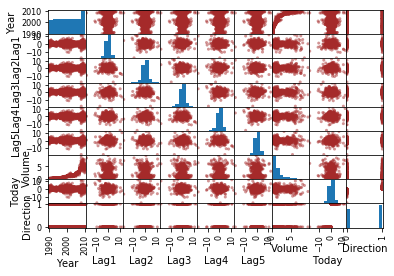

In [12]:
axes = pd.plotting.scatter_matrix(weekly, color="brown")

Include a brief description of what relationshipis and correlations you find.

In [13]:
relationships = '''the correlations between the lag variables 1, 3 and 4 and today’s returns
                   are close to zero. Also the correlation with Year and Volume is close to 
                   zero too. In other words, there appears to be little correlation between 
                   today’s returns and previous days’ returns, Time and Volume. The only 
                   substantial correlation is between lag 2 and lag 5. By plotting the data we
                   see that Volume is increasing over time. In other words, the average number
                   of shares traded daily increased from 1990 to 2010.
'''

In [14]:
grader.grade(test_case_id = 'A1_relationships_test', answer = relationships)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A2.

Use the full data set to perform a logistic regression with `Direction` as the response and the
five lag variables as predictors.

In [15]:
fit1 = smf.glm('Direction~Lag1+Lag2+Lag3+Lag4+Lag5', data = weekly, family=sm.families.Binomial()).fit()

Pass in the regression equation to `logit_equation` below. Hint: You do not need the coefficients of the equation yet, just which variables you want to include in the model. Your answer should look something like `Response~Var1+Var2` which is the input for `statsmodels.formula.api`. 

In [16]:
logit_equation = 'Direction~Lag1+Lag2+Lag3+Lag4+Lag5'

In [17]:
grader.grade(test_case_id = 'A2_logit_test', answer = logit_equation)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A3.

Use the `summary()` function to print the results. Do any of the predictors appear to be
statistically significant? Which predictors appear to be statistically significant?

In [18]:
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1083
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.37
Date:                Fri, 08 Oct 2021   Deviance:                       1486.7
Time:                        04:26:50   Pearson chi2:                 1.09e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2303      0.062      3.712      0.0

Type the number of apparently significant variables into `num_significant` and the names of the variables into the list `var_significant` -- the test case will only give points if both variables are correct!

In [19]:
num_significant = 1
var_significant = ['Lag2'] # This should be a list!

In [20]:
grader.grade(test_case_id = 'A3_significant_test', answer = (num_significant, var_significant))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A4. 
Compute the overall fraction of correct predictions. Name this variable `fraction_correct_all`.
What is the overall fraction of correct predictions?

In [21]:
print('Predicted probability of going Up:',fit1.predict())

Predicted probability of going Up: [0.59979417 0.5926544  0.57835811 ... 0.59836445 0.56799844 0.52963133]


In [22]:
encode = lambda x: 1 if x > 0.5 else 0
predictions = pd.DataFrame({'Direction': [encode(x) for x in fit1.predict()]})
predictions.head()

,Direction
0,1
1,1
2,1
3,0
4,1


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(weekly['Direction'], predictions['Direction'])

array([[ 49, 435],
       [ 41, 564]])

In [24]:
from sklearn.metrics import accuracy_score
fraction_correct_all = accuracy_score(weekly['Direction'], predictions['Direction'])

In [25]:
print(f'Overall fraction of correct predictions is {fraction_correct_all}')

Overall fraction of correct predictions is 0.5629017447199265


In [26]:
grader.grade(test_case_id = 'A4_fraction_test', answer = fraction_correct_all)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A5.

Now fit the logistic regression model using a training data period from 1990 to 2007, with
`Lag2` as the only predictor. 

Compute the overall fraction of correct predictions for the held
out data (that is, the data from 2008, 2009 and 2010) and assign it to a variable called
`fraction_correct_test`. What is the overall fraction of correct predictions?

In [30]:
# Train and test split
train = weekly[weekly["Year"] <= 2007]
test = weekly[weekly["Year"] > 2007]

# Model 
fit2 = smf.glm('Direction~Lag2', data=train, family=sm.families.Binomial()).fit()
print(fit2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  933
Model:                            GLM   Df Residuals:                      931
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -639.25
Date:                Fri, 08 Oct 2021   Deviance:                       1278.5
Time:                        04:53:39   Pearson chi2:                     933.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2266      0.066      3.422      0.0

In [32]:
Xtest = test[weekly.columns[1:-2]]
ytest = test[weekly.columns[-1]]
yprobs = fit2.predict(Xtest)

In [33]:
ypred =  [0 if y < 0.5 else 1 for y in yprobs]
confusion_matrix(ytest, ypred)

array([[ 7, 65],
       [ 5, 79]])

In [34]:
fraction_correct_test = accuracy_score(ytest, ypred)

In [35]:
print(f'Overall fraction of correct predictions is {fraction_correct_test}')

Overall fraction of correct predictions is 0.5512820512820513


Pass in the train and test datasets to make sure that they're working (feel free to rename the variables in the test case), and then run the test for `fraction_correct_test`!

In [36]:
grader.grade(test_case_id = 'A5_df_test', answer = (train, test)) 

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [37]:
grader.grade(test_case_id = 'A5_fraction_correct_test', answer = fraction_correct_test) 

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part B

Now, we want to develop an investment strategy in which we buy if the returns are greater than
$0.5\%$ and sell otherwise.

### B1. 
Create a response variable called `Response` such that

$$
\text{Response}_i = \begin{cases}
1 \text{ if Today } > 0.5 &\\
0 \text{ otherwise }
\end{cases}
$$

In [41]:
#We can also encode using one line
weekly['Response'] = [1 if weekly['Today'][x] > 0.5 else 0 for x in range(len(weekly))]
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Response
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1,1


In [42]:
grader.grade(test_case_id = 'B1_response_test', answer = weekly)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B2.
Fit a logistic regression model to predict `Response` using a training data period from 1990 to 2008, with the five
lag variables and volume as predictors.

In [44]:
train2 = weekly[weekly["Year"] <= 2008]
fit3 = smf.glm('Response~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data = train2, family=sm.families.Binomial()).fit()

Pass in the regression equation to `logit_equation_B` below

In [45]:
logit_equation_B = 'Response~Lag1+Lag2+Lag3+Lag4+Lag5+Volume'

In [46]:
grader.grade(test_case_id = 'B2_logit_test', answer = logit_equation_B)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B3.

Use the `summary()` function to print the results. Do any of the predictors appear to be
statistically significant? Which predictors appear to be statistically significant?

In [48]:
print(fit3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                  985
Model:                            GLM   Df Residuals:                      978
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -671.06
Date:                Fri, 08 Oct 2021   Deviance:                       1342.1
Time:                        05:40:45   Pearson chi2:                     985.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0780      0.094     -0.831      0.4

Type the number of apparently significant variables into `num_significant_B` and the names of the variables into the list `var_significant_B` -- the test case will only give points if both variables are correct!

In [49]:
num_significant_B = 1
var_significant_B = ['Lag1'] # This has to be a list!

In [50]:
grader.grade(test_case_id = 'B3_significant_test', answer = (num_significant_B, var_significant_B))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B4. 

Compute the overall fraction of correct predictions for the held out data (that is, the data
from 2009 and 2010). Assign this value to the variable `fraction_correct`. What is the
overall fraction of correct predictions?

In [53]:
test2 = weekly[weekly["Year"] > 2008]

In [62]:
Xtest2 = test2[weekly.columns[1:-2]]
ytest2 = test2[weekly.columns[-1]]
yprobs2 = fit3.predict(Xtest2)

In [64]:
ypred2 =  [0 if y < 0.5 else 1 for y in yprobs2]
confusion_matrix(ytest2, ypred2)

array([[52,  1],
       [51,  0]])

In [65]:
fraction_correct = accuracy_score(ytest2, ypred2)

In [66]:
print(f'Overall fraction of correct predictions is {fraction_correct}')

Overall fraction of correct predictions is 0.5


In [67]:
grader.grade(test_case_id = 'B4_fraction_test', answer = fraction_correct)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Submit

You're done! Please make sure you've run all the PennGrader cells and count up your score to be sure (there are 20 points in total) and then make sure to submit this on Codio.